In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

In [152]:
data = pd.read_csv('OnlineRetail.csv', encoding='latin1')  # Some unicode error seen. Thus using latin1 as the encoding
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [154]:
# converting invoice date to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [156]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [157]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [158]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [159]:
data.dropna(inplace=True)
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [160]:
# filtering out the duplicate values
data.drop_duplicates(keep='first', inplace=True)

In [161]:
data.shape

(401604, 8)

In [162]:
data.groupby('CustomerID')['InvoiceNo'].count()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    721
18287.0     70
Name: InvoiceNo, Length: 4372, dtype: int64

In [163]:
data.Country.value_counts().head()

United Kingdom    356728
Germany             9480
France              8475
EIRE                7475
Spain               2528
Name: Country, dtype: int64

<AxesSubplot:>

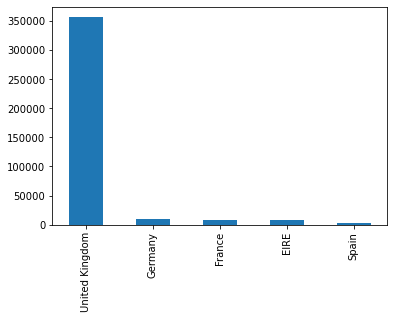

In [164]:
data.Country.value_counts().head().plot(kind='bar')

In [165]:
# As we have seen there are many countries, for now we are only considering the UK in our analysis.
data = data[data['Country'] == 'United Kingdom']

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356728 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    356728 non-null  object        
 1   StockCode    356728 non-null  object        
 2   Description  356728 non-null  object        
 3   Quantity     356728 non-null  int64         
 4   InvoiceDate  356728 non-null  datetime64[ns]
 5   UnitPrice    356728 non-null  float64       
 6   CustomerID   356728 non-null  float64       
 7   Country      356728 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.5+ MB


In [167]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,356728.000000,356728.000000,356728.000000
mean,11.198644,3.268255,15543.795284
std,264.998044,71.162330,1594.286219
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14191.000000
50%,4.000000,1.950000,15513.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [168]:
# Here we found some negative values in qty as well as Unit Price which is not possible.
# we are filtering our data for positive values
data = data[data['Quantity']>0]

In [169]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,349227.000000,349227.000000,349227.000000
mean,12.181295,2.972124,15548.333625
std,191.797470,17.990307,1594.403077
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14191.000000
50%,4.000000,1.950000,15518.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


In [170]:
# For RFM analysis we only need CustomerID, InvoiceNo, InvoiceDate, Quantity, UnitPrice columns

# CustomerID for unique customers
# InvoiceNo for counting the frequency of purchase
# Invoice Date for recencty of purchase
# Quantity and Unit price for calculatinf the total purchase

rfm_data = data[['CustomerID', 'InvoiceDate', 'InvoiceNo', 'Quantity', 'UnitPrice']]
rfm_data.head()


,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55
1,17850.0,2010-12-01 08:26:00,536365,6,3.39
2,17850.0,2010-12-01 08:26:00,536365,8,2.75
3,17850.0,2010-12-01 08:26:00,536365,6,3.39
4,17850.0,2010-12-01 08:26:00,536365,6,3.39


In [171]:
rfm_data['Totalprice'] = rfm_data['Quantity'] * rfm_data['UnitPrice']


In [172]:
rfm_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,Totalprice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [173]:
# Checking the date range
rfm_data['InvoiceDate'].min(), rfm_data['InvoiceDate'].max() 

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [174]:
# Doing the analysis till the latest date
current_date = dt.datetime(2011,12,10)

# customerId must be an integer
rfm_data['CustomerID'] = rfm_data['CustomerID'].astype('int')

In [175]:
# RFM (Recency, frequency, Motetary)

# Recency: Number of days between current date and last purchase date of ach customer
# Frequency: Number of orders for each customer
# Monetory: Total purchase price for each customer

rfm = rfm_data.groupby('CustomerID').agg({'InvoiceDate':lambda x: (current_date - x.max()).days,
                                           'InvoiceNo': lambda x : x.count(),
                                           'Totalprice': lambda x : x.sum()})

In [176]:
rfm

,InvoiceDate,InvoiceNo,Totalprice
CustomerID,,,
12346,325,1,77183.60
12747,2,103,4196.01
12748,0,4413,33053.19
12749,3,199,4090.88
12820,3,59,942.34
...,...,...,...
18280,277,10,180.60
18281,180,7,80.82
18282,7,12,178.05


In [177]:
rfm.columns = ['recency', 'frequency','monetory' ]

In [178]:
rfm

,recency,frequency,monetory
CustomerID,,,
12346,325,1,77183.60
12747,2,103,4196.01
12748,0,4413,33053.19
12749,3,199,4090.88
12820,3,59,942.34
...,...,...,...
18280,277,10,180.60
18281,180,7,80.82
18282,7,12,178.05


In [202]:
# Computing quantile and categorizing them 
# for this we are cutting the data into 4 bins
# for example, cutting monetory into 4 parts, doing same for frequency and recency

rfm['R'] = pd.qcut(rfm['recency'], 4, labels=[4,3,2,1])
rfm['F'] = pd.qcut(rfm['frequency'], 4, labels=[1,2,3,4])
rfm['M'] = pd.qcut(rfm['monetory'], 4, labels=[1,2,3,4])

In [203]:
# concatenating them to create RFM score
rfm['RFM Score'] = rfm.R.astype(str) + rfm.F.astype(str) + rfm.M.astype(str)

In [204]:
rfm

,recency,frequency,monetory,R,F,M,RFM Score
CustomerID,,,,,,,
12346,325,1,77183.60,1,1,4,114
12747,2,103,4196.01,4,4,4,444
12748,0,4413,33053.19,4,4,4,444
12749,3,199,4090.88,4,4,4,444
12820,3,59,942.34,4,3,3,433
...,...,...,...,...,...,...,...
18280,277,10,180.60,1,1,1,111
18281,180,7,80.82,1,1,1,111
18282,7,12,178.05,4,1,1,411


In [206]:
rfm['R'] = rfm['R'].astype('int')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 12346 to 18287
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   recency    3921 non-null   int64   
 1   frequency  3921 non-null   int64   
 2   monetory   3921 non-null   float64 
 3   R          3921 non-null   category
 4   F          3921 non-null   category
 5   M          3921 non-null   category
 6   RFM Score  3921 non-null   object  
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 165.2+ KB


In [207]:
# Lsts say according to our business need or marketing strategy,
# we are currently targeting the high monetory customers , mid frequency customers and low rwcwncy customers

# We will be giving weightage to the R F M to rate them on a scale of 5.

wr = 0.15 # recency weightage
wf = 0.30 # frequency weightage
wm = 0.55 # monetory weightage

rfm['Weighted_RFM'] = wr*rfm['R'].astype('int') + wf*rfm['F'].astype('int') + wm*rfm['M'].astype('int')

In [208]:
rfm

,recency,frequency,monetory,R,F,M,RFM Score,Weighted_RFM
CustomerID,,,,,,,,
12346,325,1,77183.60,1,1,4,114,2.65
12747,2,103,4196.01,4,4,4,444,4.00
12748,0,4413,33053.19,4,4,4,444,4.00
12749,3,199,4090.88,4,4,4,444,4.00
12820,3,59,942.34,4,3,3,433,3.15
...,...,...,...,...,...,...,...,...
18280,277,10,180.60,1,1,1,111,1.00
18281,180,7,80.82,1,1,1,111,1.00
18282,7,12,178.05,4,1,1,411,1.45


In [209]:
rfm['Weighted_RFM'].min(), rfm['Weighted_RFM'].max()

(1.0, 4.0)

In [214]:
np.sort(rfm['Weighted_RFM'].unique())

array([1.  , 1.15, 1.3 , 1.45, 1.55, 1.6 , 1.7 , 1.75, 1.85, 1.9 , 2.  ,
       2.05, 2.1 , 2.15, 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.55, 2.6 , 2.65,
       2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.1 , 3.15, 3.25, 3.3 ,
       3.4 , 3.45, 3.55, 3.7 , 3.85, 4.  ])

In [215]:
rfm[rfm['Weighted_RFM']>3.5]

,recency,frequency,monetory,R,F,M,RFM Score,Weighted_RFM
CustomerID,,,,,,,,
12747,2,103,4196.01,4,4,4,444,4.00
12748,0,4413,33053.19,4,4,4,444,4.00
12749,3,199,4090.88,4,4,4,444,4.00
12836,59,174,2610.36,2,4,4,244,3.70
12839,2,314,5591.42,4,4,4,444,4.00
...,...,...,...,...,...,...,...,...
18259,24,42,2338.60,3,3,4,334,3.55
18260,172,133,2628.35,1,4,4,144,3.55
18272,2,166,3078.58,4,4,4,444,4.00


In [227]:
# for these scores we have 1 to 4
#  now creating segments for the customers according to the weightes score

rfm['segment'] = np.where(rfm['Weighted_RFM']==4, "Top Customer", 
                          np.where(rfm['Weighted_RFM']>3,"High Value Customer", 
                                   np.where(rfm['Weighted_RFM']>2, "Medium Value Customer",  "Low Value Customers")))


In [228]:
rfm.head(10)

,recency,frequency,monetory,R,F,M,RFM Score,Weighted_RFM,segment
CustomerID,,,,,,,,,
12346,325,1,77183.60,1,1,4,114,2.65,Medium Value Customer
12747,2,103,4196.01,4,4,4,444,4.00,Top Customer
12748,0,4413,33053.19,4,4,4,444,4.00,Top Customer
12749,3,199,4090.88,4,4,4,444,4.00,Top Customer
12820,3,59,942.34,4,3,3,433,3.15,High Value Customer
12821,214,6,92.72,1,1,1,111,1.00,Low Value Customers
12822,70,46,948.88,2,3,3,233,2.85,Medium Value Customer
12823,74,5,1759.50,2,1,4,214,2.80,Medium Value Customer
12824,59,25,397.12,2,2,2,222,2.00,Low Value Customers


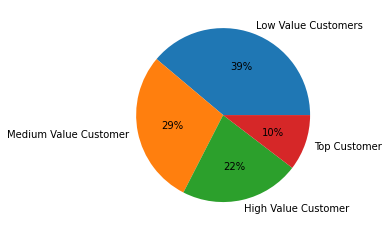

In [229]:
# Visualizing the customer segments
plt.pie(rfm.segment.value_counts(), labels= rfm.segment.value_counts().index, autopct='%.0f%%')
plt.show()